In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.metrics import silhouette_score
import itertools
import matplotlib.cm as cm 
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("cluster.csv")
df.head(5)

,Clave Municipio,Clave \nEstado,Region,Estado,Municipio,Poblacion,Poblacion Adulta,Poblacion Adulta Mujeres,Poblacion Adulta Hombres,Tipo de poblacion,PA Sucursales banca comercial,PA Sucursales banca de desarrollo,PA Sucursales Socap,PA Sucursales Sofipo,PA Total\nSucursales,PA Corresponsales,PA Cajeros,PA Terminales punto de venta,PA Establecimientos con TPV,PA Contratos que utilizan banca movil,ID Sucursales banca comercial,ID Sucursales banca de desarrollo,ID Sucursales Socap,ID Sucursales Sofipo,ID Total\nSucursales,ID Corresponsales,ID Cajeros,ID Terminales punto de venta,ID Establecimientos con TPV,ID Contratos que utilizan banca movil,Cable coaxial,DSL,Fibra optica,Creditos bienestar,Crédictos household
0,17034,17,Centro Sur y Oriente,Morelos,Coatetelco,11358.664380,8322.993754,4363.726993,3959.266761,En Transición,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,330
1,17035,17,Centro Sur y Oriente,Morelos,Xoxocotla,26273.256750,19373.545740,10081.864690,9291.681056,Semi-urbano,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,2
2,20048,20,Sur,Oaxaca,Magdalena Mixtepec,1411.062096,964.522264,495.295776,469.226488,Rural,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,19
3,7120,7,Sur,Chiapas,Capitán Luis Ángel Vidal,4062.593436,2833.637249,1418.781987,1414.855262,Rural,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.529033,0,0,0,0,0
4,7124,7,Sur,Chiapas,Mezcalapa,43482.662600,30731.358820,15796.596430,14934.762390,Semi-urbano,0,0,0,0,0,0,0,0,0,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.158811,0,0,0,1,30


In [3]:
np.triu(np.ones_like(df.corr()))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0

C:\Users\syste\AppData\Local\Temp/ipykernel_10388/751747381.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


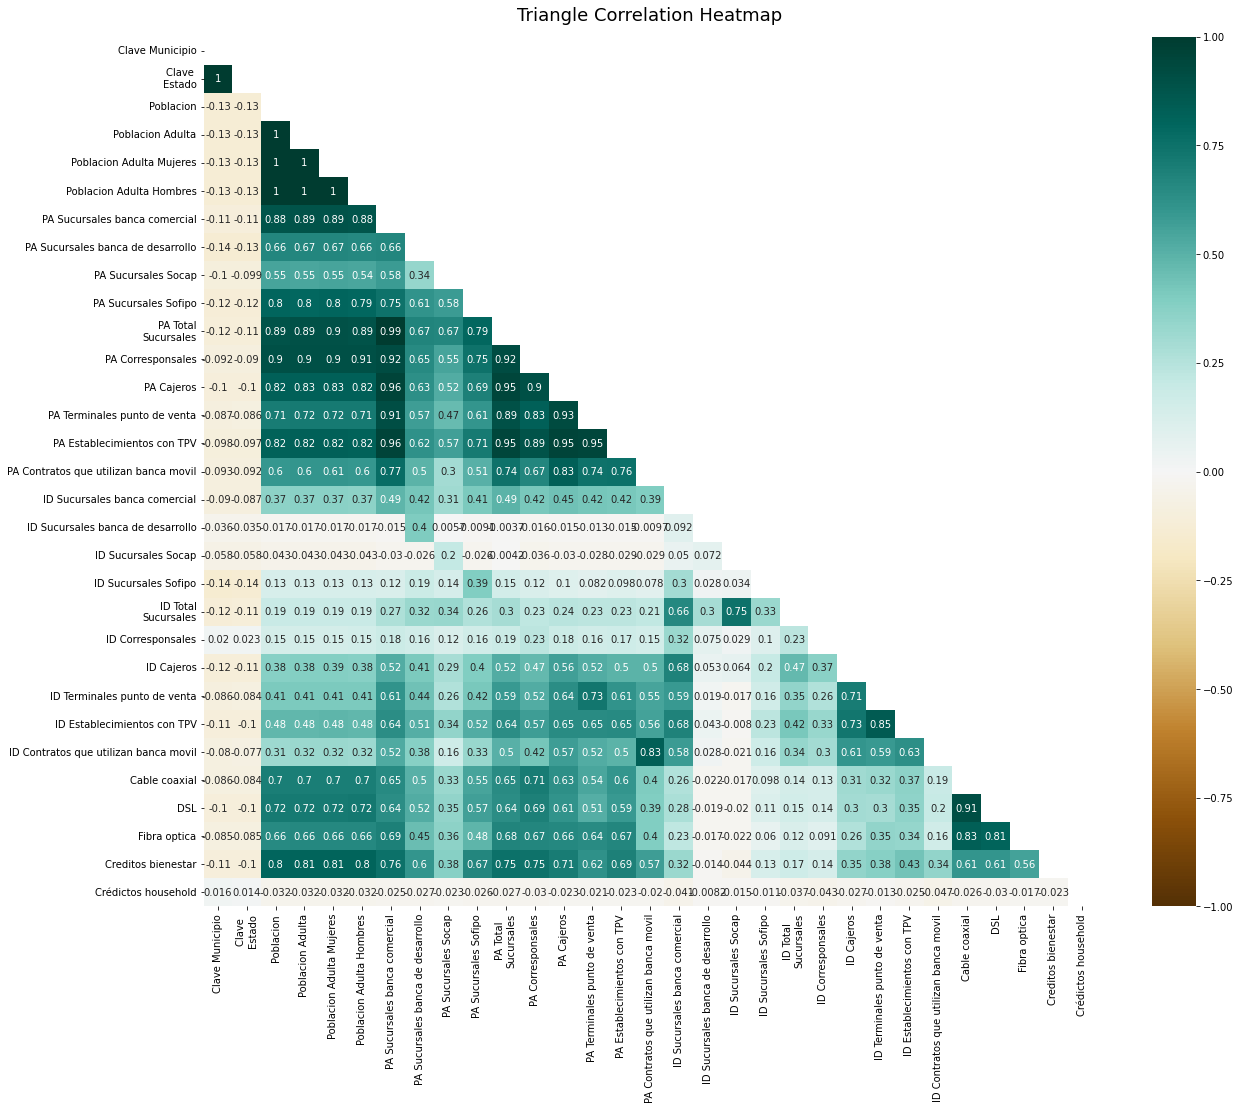

In [4]:
plt.figure(figsize=(20, 16))

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [5]:
df2 = df[["ID Contratos que utilizan banca movil", "PA Contratos que utilizan banca movil", "PA Sucursales banca comercial", "PA Sucursales banca de desarrollo", "PA Corresponsales", "PA Cajeros", "PA Terminales punto de venta", "PA Establecimientos con TPV", "ID Sucursales banca comercial", "ID Cajeros", "ID Terminales punto de venta", "ID Establecimientos con TPV", "Cable coaxial", "DSL", "Fibra optica", "Creditos bienestar", "Crédictos household"]]
np.triu(np.ones_like(df2.corr()))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1

C:\Users\syste\AppData\Local\Temp/ipykernel_10244/3933853594.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df2.corr(), dtype=np.bool))


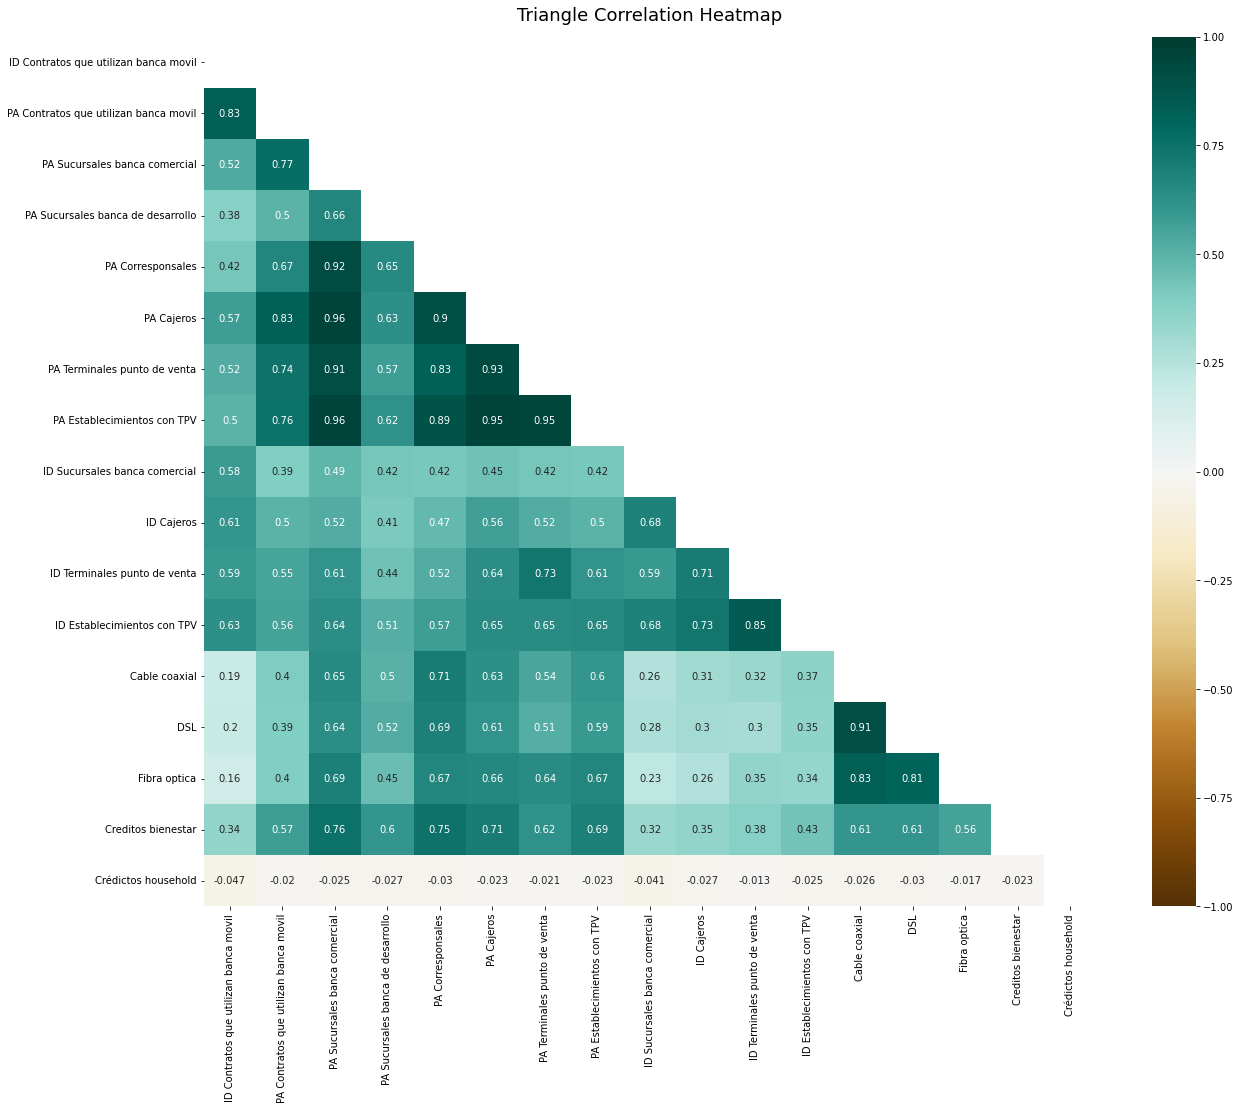

In [6]:
plt.figure(figsize=(20, 15))

mask = np.triu(np.ones_like(df2.corr(), dtype=np.bool))
heatmap = sns.heatmap(df2.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [7]:
df_fc = df[["ID Contratos que utilizan banca movil", "ID Sucursales banca comercial", "ID Terminales punto de venta", "ID Establecimientos con TPV", "Cable coaxial", "DSL", "Creditos bienestar"]]
np.triu(np.ones_like(df_fc.corr()))

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

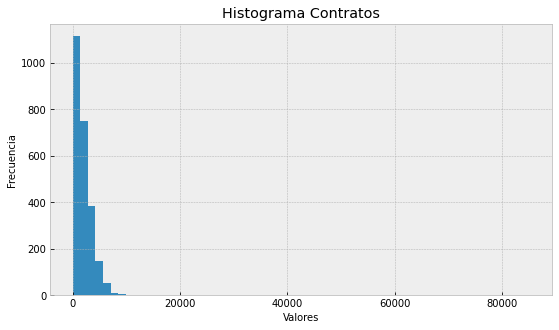

In [19]:
plt.style.use("bmh")
plt.figure(figsize=(9,5))

plt.title('Histograma Contratos')
plt.hist(df_fc["ID Contratos que utilizan banca movil"], bins = 60)
plt.grid(True)
plt.xlabel('Valores', fontsize = 10) 
plt.ylabel('Frecuencia', fontsize = 10) 
plt.savefig("histograma.jpg");

C:\Users\syste\AppData\Local\Temp/ipykernel_10388/1454708895.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_fc.corr(), dtype=np.bool))


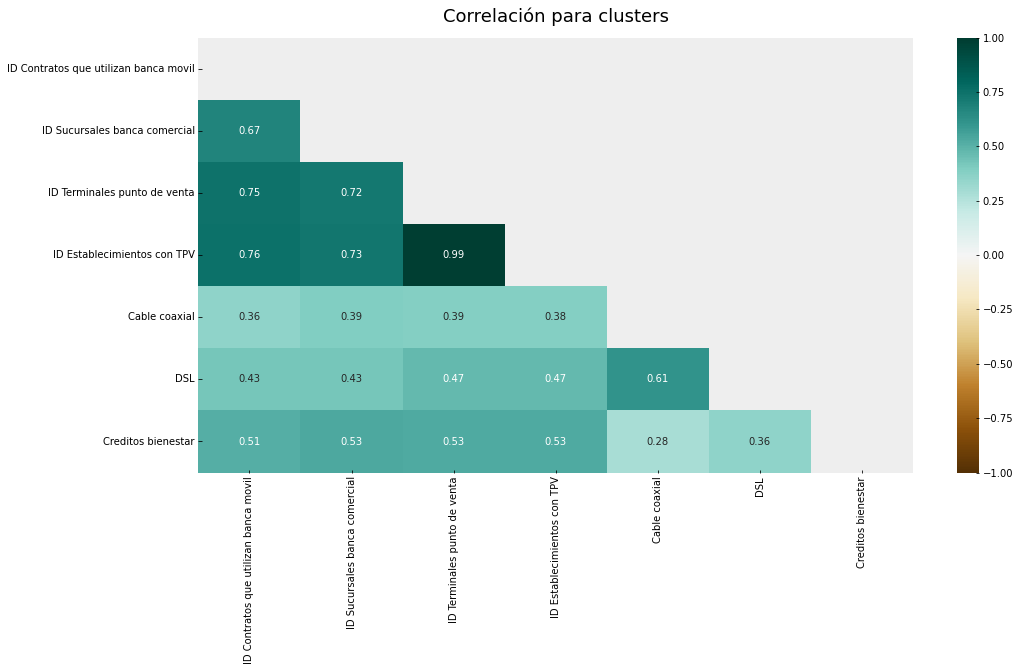

In [20]:
plt.figure(figsize=(16, 8))

mask = np.triu(np.ones_like(df_fc.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_fc.corr(method='spearman'), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación para clusters', fontdict={'fontsize':18}, pad=16);
plt.savefig("correlación.jpg", bbox_inches='tight')

In [27]:
print("Datos empleados")
df_fc.isnull().sum().sort_values(ascending=False)

Datos empleados


ID Contratos que utilizan banca movil    0
ID Sucursales banca comercial            0
ID Terminales punto de venta             0
ID Establecimientos con TPV              0
Cable coaxial                            0
DSL                                      0
Creditos bienestar                       0
dtype: int64

In [28]:
print("Datos empleados")
df_fc.dtypes

Datos empleados


ID Contratos que utilizan banca movil    float64
ID Sucursales banca comercial            float64
ID Terminales punto de venta             float64
ID Establecimientos con TPV              float64
Cable coaxial                              int64
DSL                                        int64
Creditos bienestar                         int64
dtype: object

In [21]:
scaler = StandardScaler() 
scaled_c = scaler.fit_transform(df_fc) 
normalized_c = normalize(scaled_c) 
normalized_c = pd.DataFrame(normalized_c,columns=df_fc.columns) 

In [22]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_c) 
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2'] 
X_principal.head()

,P1,P2
0,-0.558623,-0.192106
1,-0.558623,-0.192106
2,-0.558623,-0.192106
3,-0.558820,-0.191864
4,-0.559033,-0.191572


In [29]:
print("Datos de 2D para el modelo")
X_principal.describe()

Datos de 2D para el modelo


,P1,P2
count,2.465000e+03,2.465000e+03
mean,-4.612042e-17,3.459032e-17
std,7.206687e-01,3.372069e-01
min,-6.043067e-01,-8.845352e-01
25%,-5.825497e-01,-1.512672e-01
50%,-4.797024e-01,-4.107986e-02
75%,7.642050e-01,1.995088e-01
max,1.361761e+00,9.578149e-01


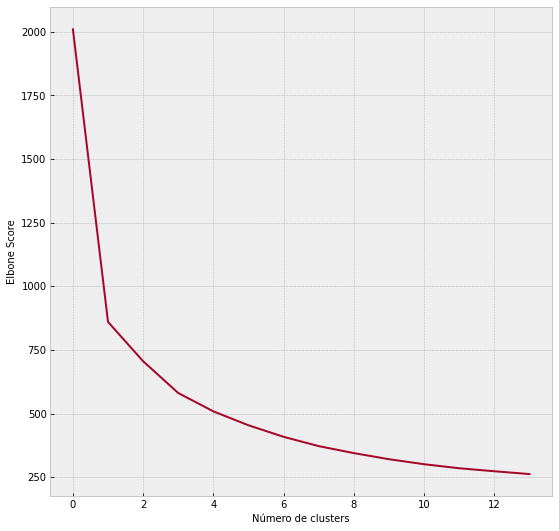

In [13]:
plt.style.use("bmh")
plt.figure(figsize=(9,9))

Sum_of_squared_distances = []
for k in range(1,15):
    km = KMeans(n_clusters=k)
    km = km.fit(normalized_c)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(Sum_of_squared_distances, color='C1');
plt.xlabel('Número de clusters', fontsize = 10) 
plt.ylabel('Elbone Score', fontsize = 10) 
plt.savefig("elbone_score.jpg")

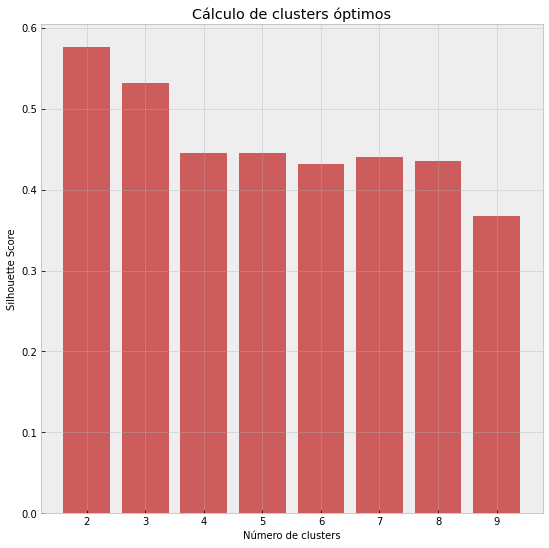

In [30]:
plt.style.use("bmh")
plt.figure(figsize=(9,9))

silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append( 
        silhouette_score(normalized_c, KMeans(n_clusters = n_cluster).fit_predict(normalized_c))) 
    
# Plotting a bar graph to compare the results 
k = range(2,10)
plt.bar(k, silhouette_scores, color=['#CD5C5C']) 
plt.xlabel('Número de clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.title('Cálculo de clusters óptimos')
plt.savefig("silhouette_score.jpg")

In [15]:
n_clusters = 4
km = KMeans(n_clusters=n_clusters)
km.fit(normalized_c);
two_cluster = X_principal
two_cluster["cluster"] = km.predict(normalized_c)
two_cluster.head()
unique_list = list(set(two_cluster["cluster"]))
unique_list

[0, 1, 2, 3]

In [16]:
two_cluster.to_csv('two_cluster.csv', index=False)

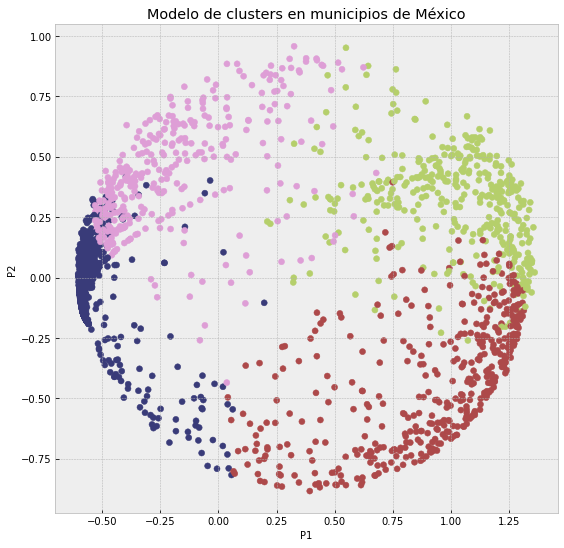

In [32]:
n_clusters = 4
plt.style.use("bmh")
plt.figure(figsize=(9,9))

km = KMeans(n_clusters=n_clusters)
km.fit(normalized_c);
plt.scatter(X_principal['P1'], X_principal['P2'], c = km.predict(normalized_c), cmap="tab20b")
plt.title('Modelo de clusters en municipios de México')
plt.xlabel('P1', fontsize = 10) 
plt.ylabel('P2', fontsize = 10);
plt.savefig("clusters.jpg")

In [18]:
df_fc = df[["ID Contratos que utilizan banca movil", "ID Sucursales banca comercial", "ID Terminales punto de venta", "ID Establecimientos con TPV", "Cable coaxial", "DSL", "Creditos bienestar"]]


In [19]:
df_fc["c"] = km.predict(normalized_c)
df_fc.head()
df_fc.to_csv('data_python.csv', index=False)

C:\Users\syste\AppData\Local\Temp/ipykernel_10244/654184092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fc["c"] = km.predict(normalized_c)


In [20]:
df_fc.head()

,ID Contratos que utilizan banca movil,ID Sucursales banca comercial,ID Terminales punto de venta,ID Establecimientos con TPV,Cable coaxial,DSL,Creditos bienestar,c
0,0.000000,0.0,0.0,0.0,0,0,0,1
1,0.000000,0.0,0.0,0.0,0,0,0,1
2,0.000000,0.0,0.0,0.0,0,0,0,1
3,3.529033,0.0,0.0,0.0,0,0,0,1
4,7.158811,0.0,0.0,0.0,0,0,1,1


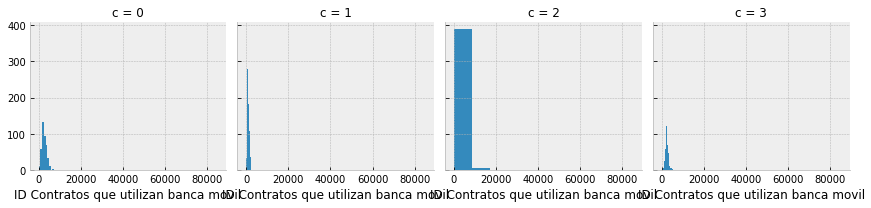

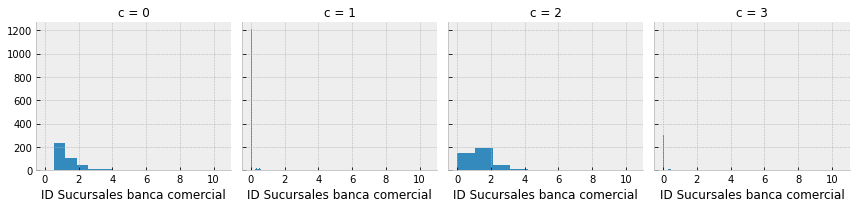

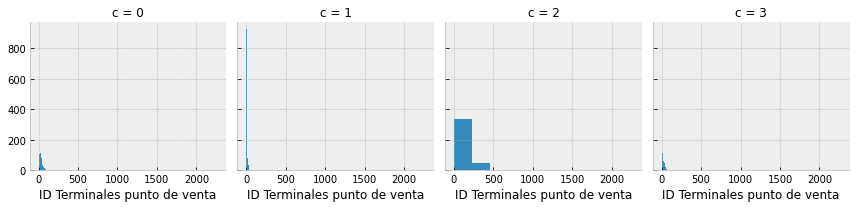

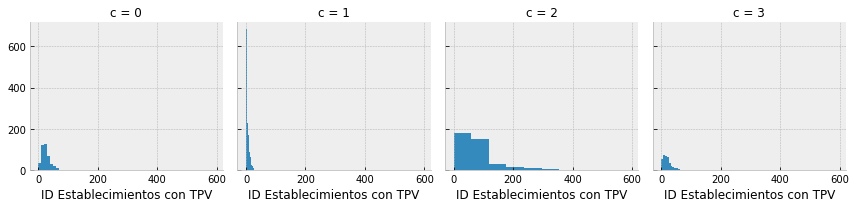

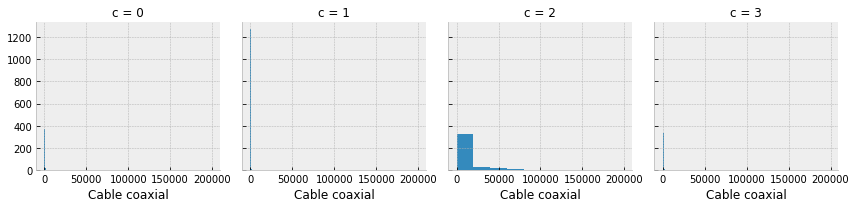

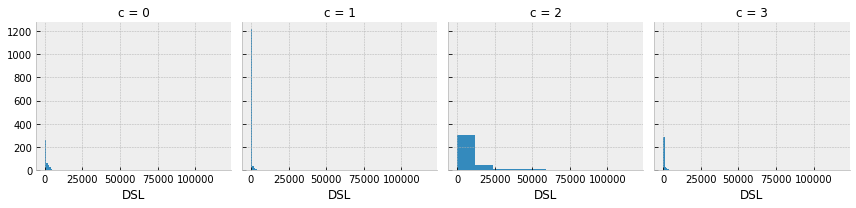

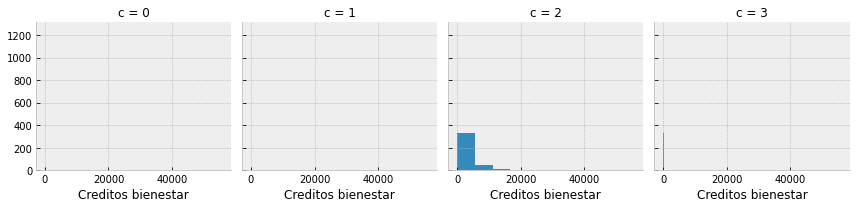

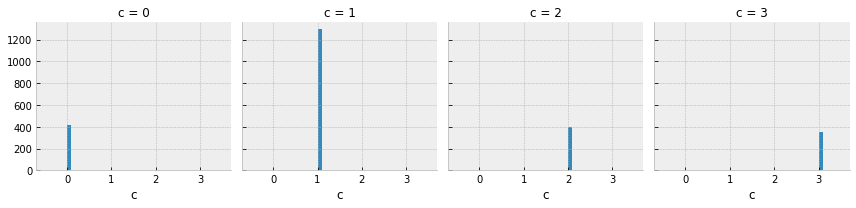

In [21]:
for col in df_fc:
    grid= sns.FacetGrid(df_fc, col='c')
    grid.map(plt.hist, col)